# Imports and setup

## Python libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from multiprocessing import Pool, Manager
import itertools
import pandas as pd
import time
import csv

In [2]:
import datetime

## Pys and Pyxs

In [3]:
import plot_init as pu
from model_v_4_20 import Road
#from simulation import simulate

In [4]:
# matplotlib.rcParams.update(pu.params)
matplotlib.rcParams.update(pu.params)

plt.rcParams["figure.figsize"]

[3.5, 2.625]

In [5]:
from plotter_functions import *
from sim_fns import *

# Throughput 

## PARAMETERS

In [6]:
sim_time = 3000
trans_time = 1000
roadlength = 500
num_trials = 50
#num_lanes = 1


vmax = 5
p_slow = 0.1
periodic = True

#frac_tnv = 0
#alpha = 0
#tnv_wait_time = 5
station_period = 1
#num_lanes = 2


In [7]:
#num_trials=50
densities = np.linspace(0.1, 0.9, 25)
tnv_fracs = [0.1, 0.5, 1.0]
wait_times = [1, 2, 5, 10]
trials = range(num_trials)

In [8]:
densities

array([0.1       , 0.13333333, 0.16666667, 0.2       , 0.23333333,
       0.26666667, 0.3       , 0.33333333, 0.36666667, 0.4       ,
       0.43333333, 0.46666667, 0.5       , 0.53333333, 0.56666667,
       0.6       , 0.63333333, 0.66666667, 0.7       , 0.73333333,
       0.76666667, 0.8       , 0.83333333, 0.86666667, 0.9       ])

In [9]:
densities2 = densities/2

print(densities2)

[0.05       0.06666667 0.08333333 0.1        0.11666667 0.13333333
 0.15       0.16666667 0.18333333 0.2        0.21666667 0.23333333
 0.25       0.26666667 0.28333333 0.3        0.31666667 0.33333333
 0.35       0.36666667 0.38333333 0.4        0.41666667 0.43333333
 0.45      ]


In [10]:
high_densities = np.linspace(0.1, 0.5, 10)
low_densities = np.linspace(0.5, 0.9, 10)

high_densities2 = high_densities/2
low_densities = low_densities/2

In [11]:
strats = [ [1,0,0], [0,1,0], [0.5,0.5,0], [0.75,0.25,0], [0.25,0.75,0] ]

In [12]:
alphas = [10**-1, 10**-2, 10**-3, 10**-4]

In [13]:
glob_vars = {
    'roadlength' : roadlength,
    'vmax' : vmax,
    'p_slow' : p_slow,
    'periodic' : periodic,
    'sim_time' : sim_time,
    'trans_time' : trans_time,
    'num_lanes' : 1
}

In [14]:
glob_vars2 = {
    'roadlength' : roadlength,
    'vmax' : vmax,
    'p_slow' : p_slow,
    'periodic' : periodic,
    'sim_time' : sim_time,
    'trans_time' : trans_time,
    'num_lanes' : 2
}

In [15]:
no_tnv = pd.read_csv("data/hi_res_no_tnv.csv")

In [16]:
no_tnv = no_tnv.sort_values('density')

In [17]:
no_tnv = no_tnv[no_tnv['alpha']==10**-1]

In [18]:
df_no_tnv = df_extractor(no_tnv,num_trials)

# p1 dominant

In [19]:
p1_alpha1_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha1_p1_dens.csv")

In [20]:
p1_alpha2_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha2_p1_dens.csv")
p1_alpha3_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha3_p1_dens.csv")
p1_alpha4_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha4_p1_dens.csv")

In [21]:
p1_alpha1_tnv1 = p1_alpha1_tnv1.sort_values('density')

In [22]:
p1_alpha2_tnv1 = p1_alpha2_tnv1.sort_values('density')
p1_alpha3_tnv1 = p1_alpha3_tnv1.sort_values('density')
p1_alpha4_tnv1 = p1_alpha4_tnv1.sort_values('density')

In [23]:
p1_alpha1_tnv1

,throughput,frac_tnv,density,true_density,trial,alpha,p_slow,p_1,p_2,tnv_wait_time,ave_trips
0,0.088781,1,0.1,0.1,16,0.1,0.1,1,0,2,29.879999
27,0.088781,1,0.1,0.1,18,0.1,0.1,1,0,2,29.879999
28,0.088781,1,0.1,0.1,21,0.1,0.1,1,0,2,29.879999
29,0.088781,1,0.1,0.1,29,0.1,0.1,1,0,2,29.879999
30,0.088781,1,0.1,0.1,22,0.1,0.1,1,0,2,29.879999
...,...,...,...,...,...,...,...,...,...,...,...
1219,0.088469,1,0.9,0.9,17,0.1,0.1,1,0,2,16.204445
1220,0.088861,1,0.9,0.9,8,0.1,0.1,1,0,2,16.360001
1221,0.088649,1,0.9,0.9,20,0.1,0.1,1,0,2,16.335556
1210,0.088877,1,0.9,0.9,10,0.1,0.1,1,0,2,16.397778


In [24]:
df_p1_alpha1_tnv1 = df_extractor(p1_alpha1_tnv1,num_trials)

In [25]:
df_p1_alpha2_tnv1 = df_extractor(p1_alpha2_tnv1,num_trials)
df_p1_alpha3_tnv1 = df_extractor(p1_alpha3_tnv1,num_trials)
df_p1_alpha4_tnv1 = df_extractor(p1_alpha4_tnv1,num_trials)

In [26]:
df_p1_alpha1_tnv1.keys()

dict_keys(['q_arr', 'mean_q_arr', 'errorbars'])

In [27]:
len(densities)

25

In [28]:
len(df_no_tnv['mean_q_arr'])

25

In [29]:
len(df_p1_alpha1_tnv1['mean_q_arr'])

25

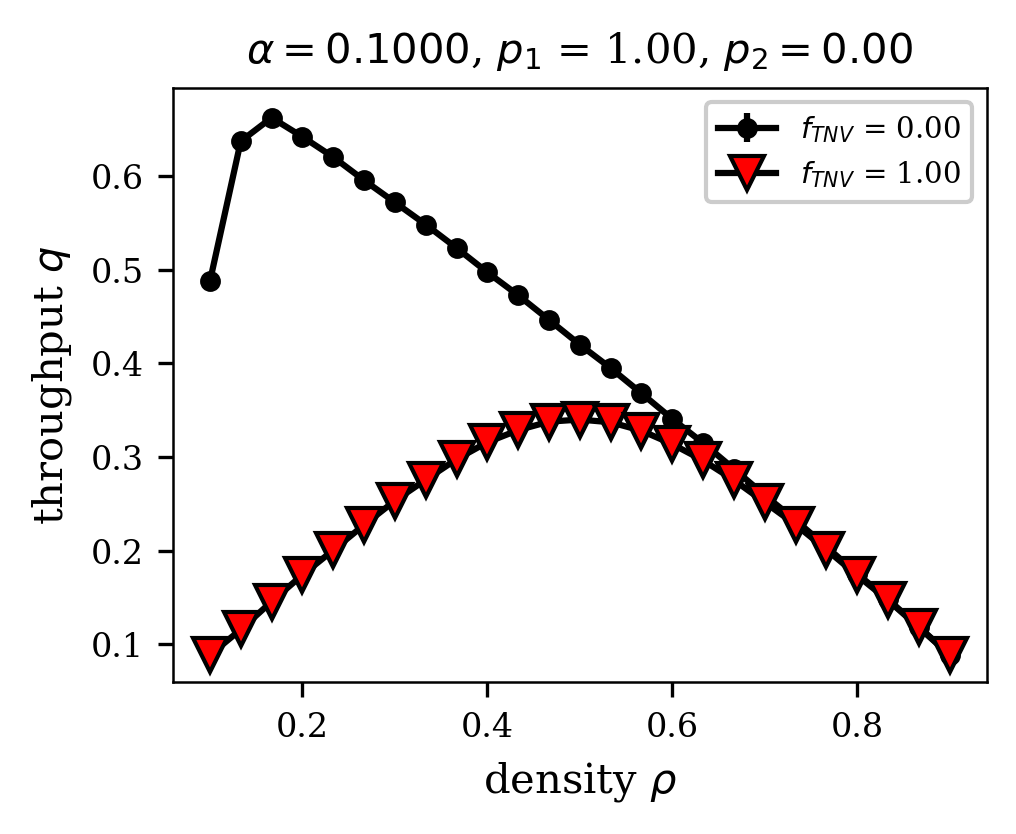

In [30]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p1_alpha1_tnv1["mean_q_arr"],df_p1_alpha1_tnv1["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-1,1,0))
plt.legend()
plt.savefig('p1_dominant_alpha1' ,bbox_inches='tight')

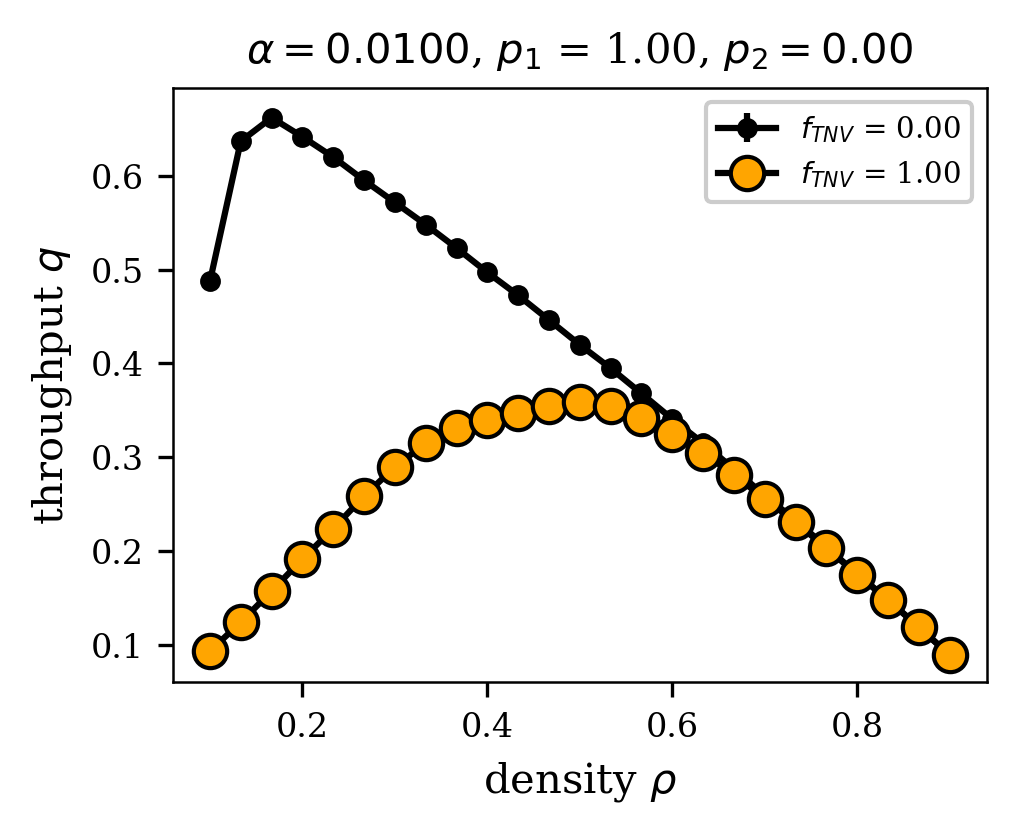

In [31]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p1_alpha2_tnv1["mean_q_arr"],df_p1_alpha2_tnv1["errorbars"],"o","orange","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-2,1,0))
plt.legend()
plt.savefig('p1_dominant_alpha2' ,bbox_inches='tight')

In [32]:
df_p1_alpha1_tnv1['mean_q_arr'][np.argmax(df_p1_alpha1_tnv1["mean_q_arr"])]

0.3399890133333333

In [33]:
densities[np.argmax(df_p1_alpha1_tnv1["mean_q_arr"])]

0.5

In [34]:
df_p1_alpha1_tnv1['mean_q_arr'][np.argmax(df_p1_alpha1_tnv1["mean_q_arr"])]/densities[np.argmax(df_p1_alpha1_tnv1["mean_q_arr"])]

0.6799780266666666

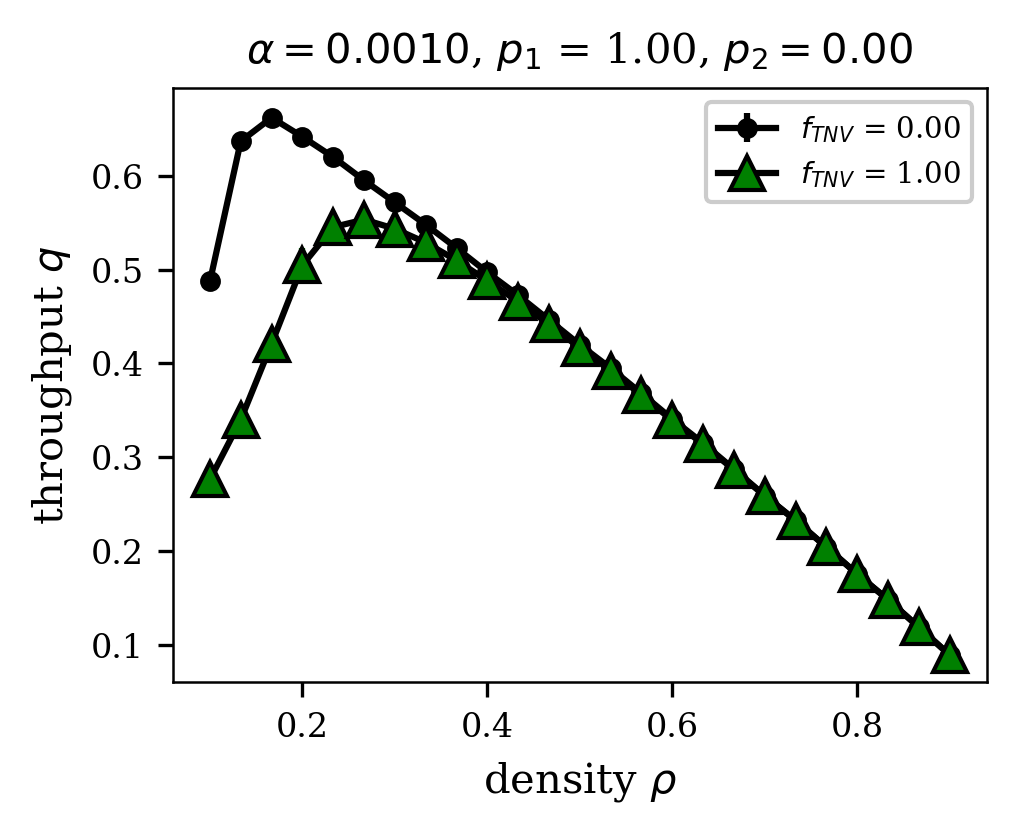

In [35]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p1_alpha3_tnv1["mean_q_arr"],df_p1_alpha3_tnv1["errorbars"],"^","green","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-3,1,0))
plt.legend()
plt.savefig('p1_dominant_alpha3' ,bbox_inches='tight')

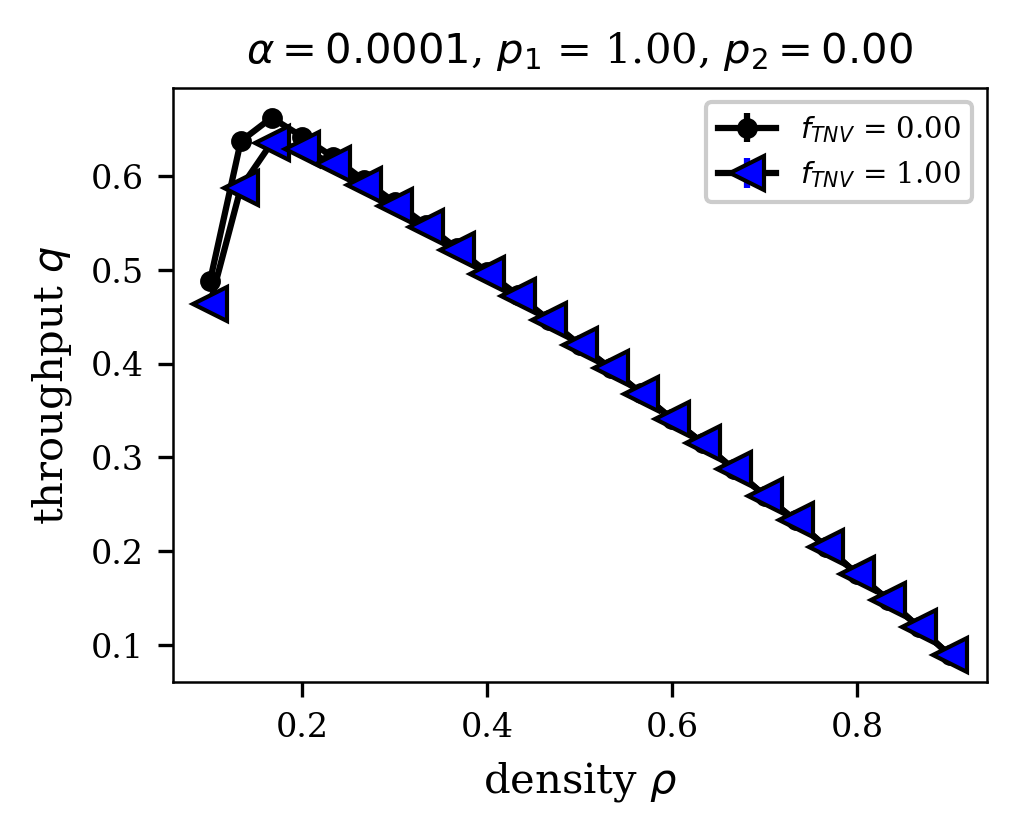

In [36]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p1_alpha4_tnv1["mean_q_arr"],df_p1_alpha4_tnv1["errorbars"],"<","blue","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-4,1,0))
plt.legend()
plt.savefig('p1_dominant_alpha4' ,bbox_inches='tight')

# p2 dominant

In [37]:
p2_alpha1_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha1_p2_dens.csv")
p2_alpha2_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha2_p2_dens.csv")
p2_alpha3_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha3_p2_dens.csv")
p2_alpha4_tnv1 = pd.read_csv("data/onelane_1tnvfrac_1strat_alpha4_p2_dens.csv")

In [38]:
p2_alpha1_tnv1 = p2_alpha1_tnv1.sort_values('density')
p2_alpha2_tnv1 = p2_alpha2_tnv1.sort_values('density')
p2_alpha3_tnv1 = p2_alpha3_tnv1.sort_values('density')
p2_alpha4_tnv1 = p2_alpha4_tnv1.sort_values('density')

In [39]:
df_p2_alpha1_tnv1 = df_extractor(p2_alpha1_tnv1,num_trials)
df_p2_alpha2_tnv1 = df_extractor(p2_alpha2_tnv1,num_trials)
df_p2_alpha3_tnv1 = df_extractor(p2_alpha3_tnv1,num_trials)
df_p2_alpha4_tnv1 = df_extractor(p2_alpha4_tnv1,num_trials)

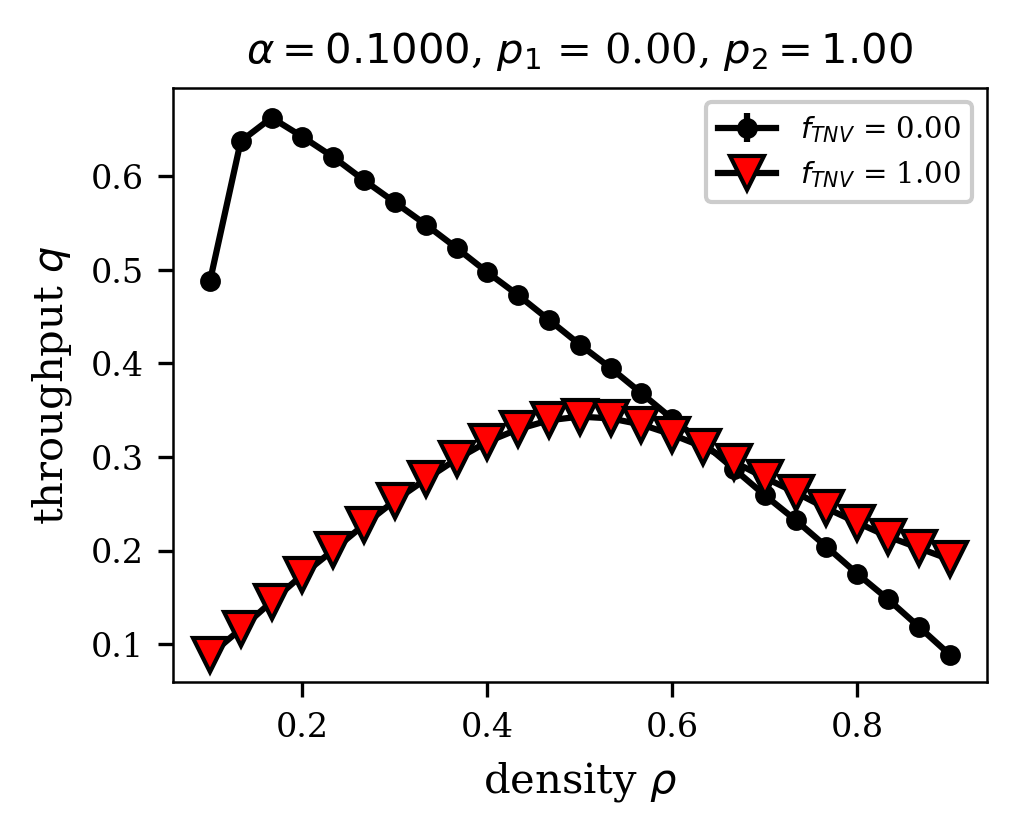

In [40]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p2_alpha1_tnv1["mean_q_arr"],df_p2_alpha1_tnv1["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-1,0,1))
plt.legend()
plt.savefig('p2_dominant_alpha1' ,bbox_inches='tight')

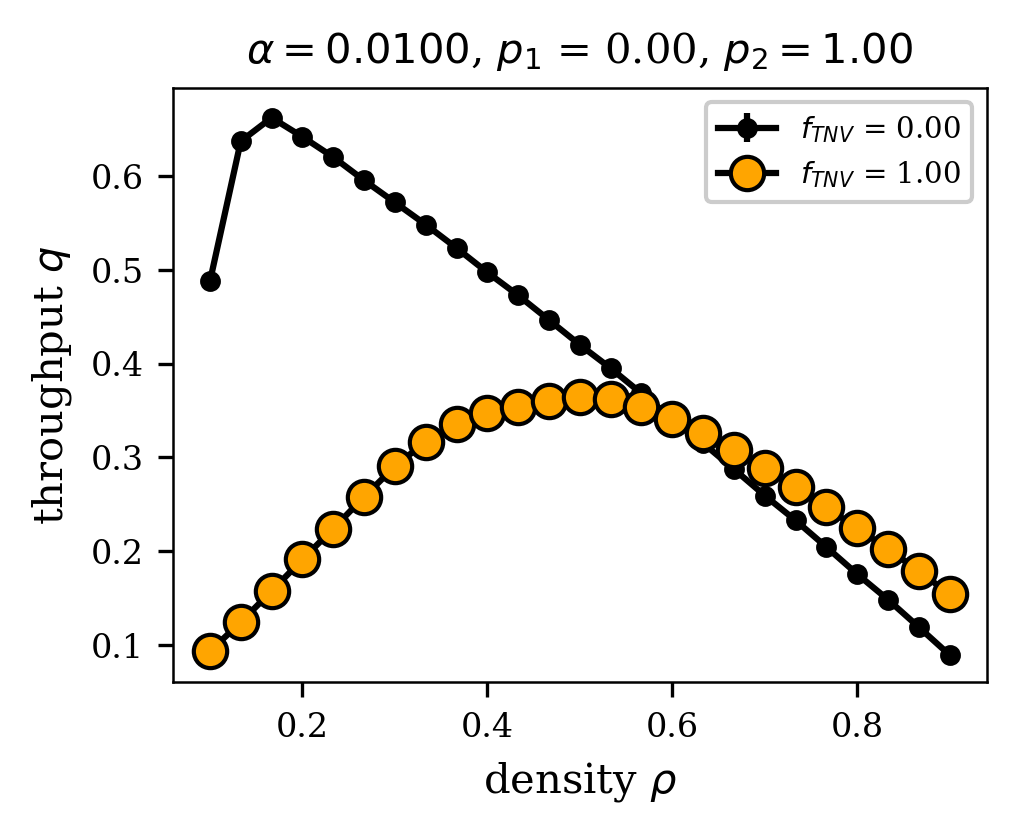

In [41]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p2_alpha2_tnv1["mean_q_arr"],df_p2_alpha2_tnv1["errorbars"],"o","orange","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-2,0,1))
plt.legend()
plt.savefig('p2_dominant_alpha2' ,bbox_inches='tight')

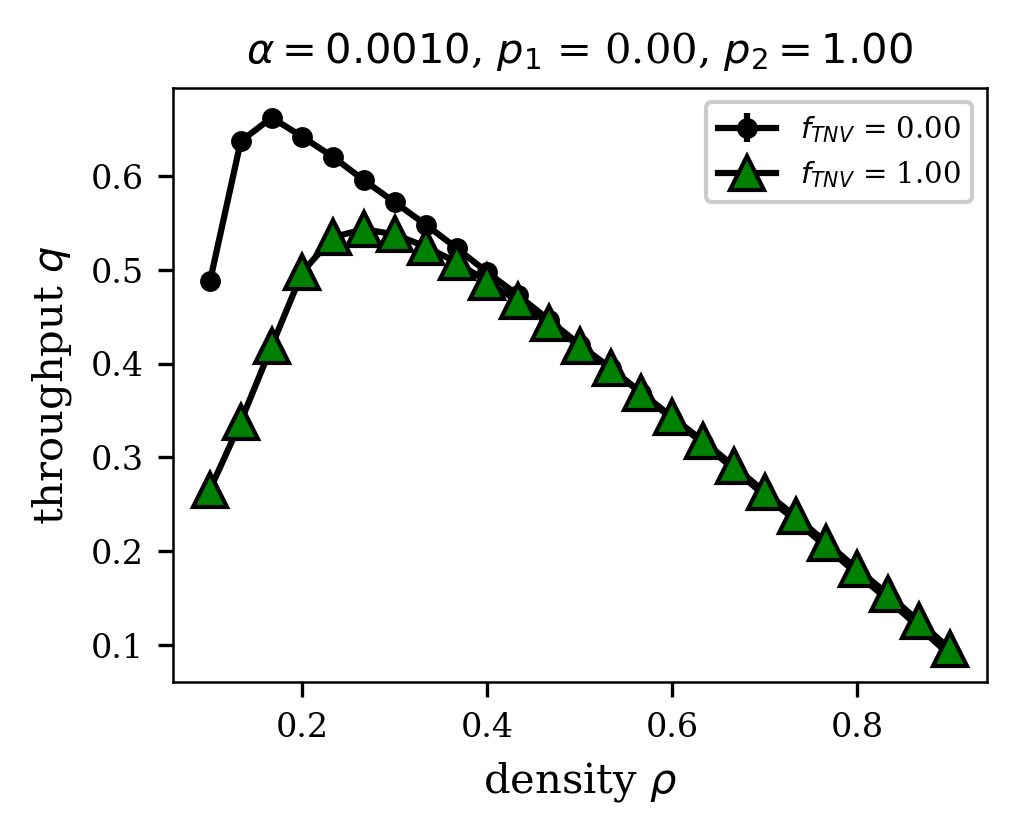

In [42]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p2_alpha3_tnv1["mean_q_arr"],df_p2_alpha3_tnv1["errorbars"],"^","green","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-3,0,1))
plt.legend()
plt.savefig('p2_dominant_alpha3' ,bbox_inches='tight')

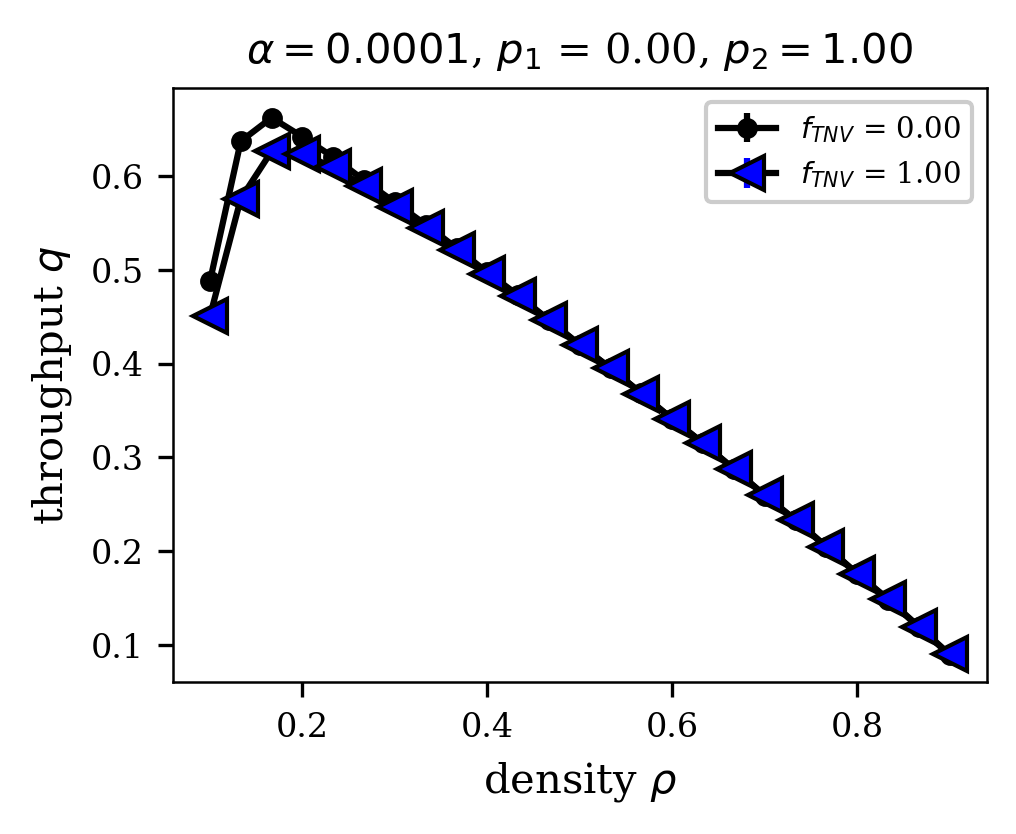

In [43]:
qdens_plotter(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],".","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter(densities,df_p2_alpha4_tnv1["mean_q_arr"],df_p2_alpha4_tnv1["errorbars"],"<","blue","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter(low_densities,DF_p1_low_a1_tnv01["mean_q_arr"],DF_p1_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$"%(10**-4,0,1))
plt.legend()
plt.savefig('p2_dominant_alpha4' ,bbox_inches='tight')

In [44]:
for i in range(len(densities)):
    if df_p2_alpha1_tnv1['mean_q_arr'][i]>df_no_tnv["mean_q_arr"][i]:
        print(i)
        break

17


In [45]:
for i in range(len(densities)):
    if df_p2_alpha2_tnv1['mean_q_arr'][i]>df_no_tnv["mean_q_arr"][i]:
        print(i)
        break

15


In [46]:
densities[15]

0.6

In [47]:
densities[17]

0.6666666666666666

# Trips

In [48]:
def trip_extractor(df,num_trials):
    #sorted_df = df.sort_values("tripity")
    ave_trip = df
    mean_trip = np.mean(ave_trip.reshape(-1, num_trials), axis=1)
    
    composite_list = [ave_trip[x:x+num_trials] for x in range(0, len(ave_trip),num_trials)]
    #composite_list
    errorbars = []

    for grp in range(len(composite_list)):
        errbars = []
        errbars.append(abs(np.percentile(composite_list[grp],25) - mean_trip[grp]))
        errbars.append(abs(np.percentile(composite_list[grp],75) - mean_trip[grp]))
        errorbars.append(errbars)

    results = {
        "ave_trip" : ave_trip,
        "mean_trip" : mean_trip,
        "errorbars" : errorbars
    }
    
    
    return results    


In [49]:
trips_p1_a1 = p2_alpha1_tnv1['ave_trips'].to_numpy()
trips_p1_a2 = p2_alpha2_tnv1['ave_trips'].to_numpy()
trips_p1_a3 = p2_alpha3_tnv1['ave_trips'].to_numpy()
trips_p1_a4 = p2_alpha4_tnv1['ave_trips'].to_numpy()

Trips_p1_a1 = trip_extractor(trips_p1_a1,num_trials)
Trips_p1_a2 = trip_extractor(trips_p1_a2,num_trials)
Trips_p1_a3 = trip_extractor(trips_p1_a3,num_trials)
Trips_p1_a4 = trip_extractor(trips_p1_a4,num_trials)

In [50]:
trips_p2_a1 = p2_alpha1_tnv1['ave_trips'].to_numpy()
trips_p2_a2 = p2_alpha2_tnv1['ave_trips'].to_numpy()
trips_p2_a3 = p2_alpha3_tnv1['ave_trips'].to_numpy()
trips_p2_a4 = p2_alpha4_tnv1['ave_trips'].to_numpy()

Trips_p2_a1 = trip_extractor(trips_p2_a1,num_trials)
Trips_p2_a2 = trip_extractor(trips_p2_a2,num_trials)
Trips_p2_a3 = trip_extractor(trips_p2_a3,num_trials)
Trips_p2_a4 = trip_extractor(trips_p2_a4,num_trials)

In [51]:
def qdens_plotter2(densities, med_array, err_array, marker, in_color, linestyle, plot_label):
    final_err_erray = np.array(err_array).T
    plt.errorbar(densities, med_array,final_err_erray, marker = marker, markerfacecolor = in_color, linestyle = linestyle, color = in_color, markeredgecolor=in_color, ecolor=in_color, label=plot_label)

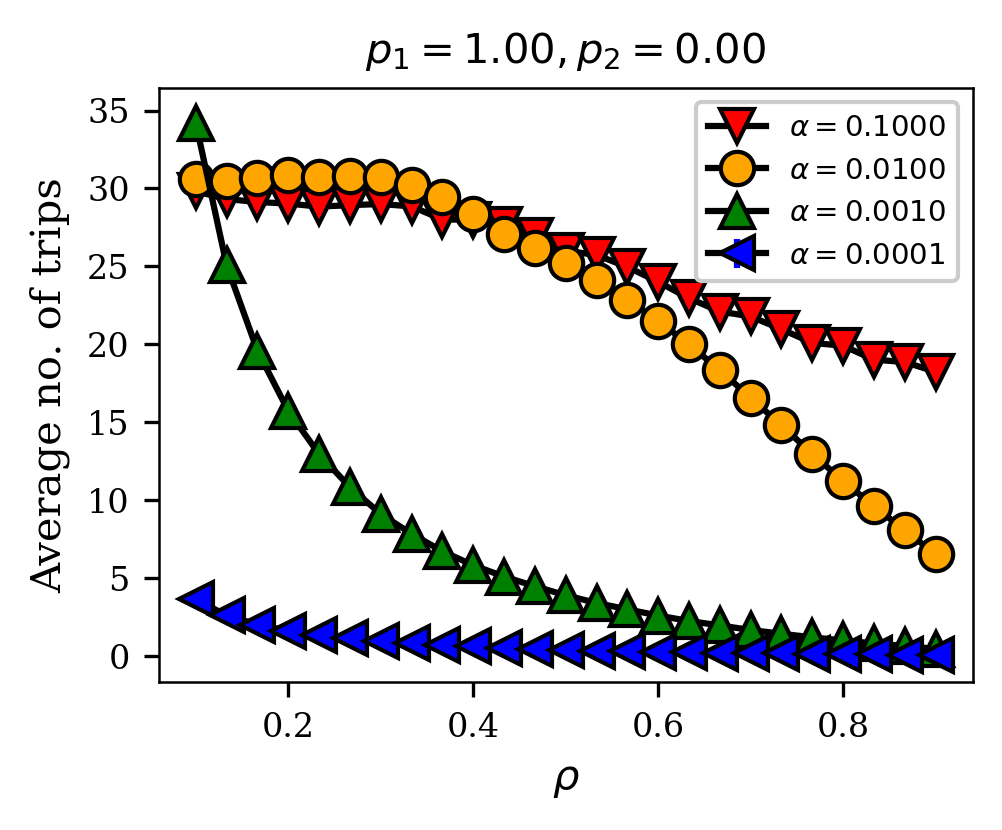

In [52]:
qdens_plotter(densities, Trips_p1_a1['mean_trip'], Trips_p1_a1['errorbars'], "v", "red", "-", r"$\alpha = %.4f$"%10**-1)
qdens_plotter(densities, Trips_p1_a2['mean_trip'], Trips_p1_a2['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
qdens_plotter(densities, Trips_p1_a3['mean_trip'], Trips_p1_a3['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
qdens_plotter(densities, Trips_p1_a4['mean_trip'], Trips_p1_a4['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a1['mean_trip'],Trip_7525_a1['mean_trip']-Trip_7525_a1['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$p_{1}=%.2f,p_{2}=%.2f$"%(1,0))

plt.legend()
plt.savefig('trips_p1.png' ,bbox_inches='tight') 


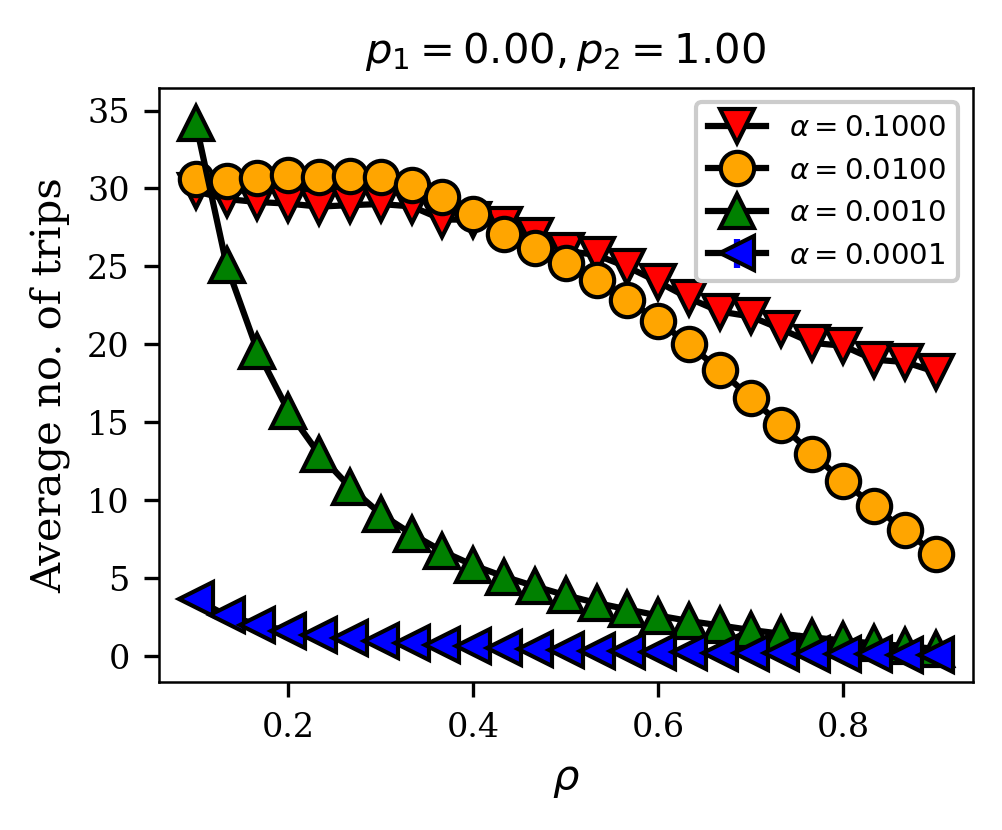

In [53]:
qdens_plotter(densities, Trips_p2_a1['mean_trip'], Trips_p1_a1['errorbars'], "v", "red", "-", r"$\alpha = %.4f$"%10**-1)
qdens_plotter(densities, Trips_p2_a2['mean_trip'], Trips_p1_a2['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
qdens_plotter(densities, Trips_p2_a3['mean_trip'], Trips_p1_a3['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
qdens_plotter(densities, Trips_p2_a4['mean_trip'], Trips_p1_a4['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a1['mean_trip'],Trip_7525_a1['mean_trip']-Trip_7525_a1['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$p_{1}=%.2f,p_{2}=%.2f$"%(0,1))

plt.legend()
plt.savefig('trips_p2.png' ,bbox_inches='tight') 
